In [6]:
import pandas as pd
from prophet import Prophet
import numpy as np
import matplotlib.pyplot as plt # plotting

# Hypothetical historical data
data = {
    'ds': pd.date_range(start='2021-01-01', periods=365, freq='D'),
    'y': np.random.normal(20000, 2000, 365),  # Simulated electricity demand
    'temp': np.random.normal(20, 5, 365),     # Simulated average temperature
    'is_weekend': [1 if day.weekday() >= 5 else 0 for day in pd.date_range(start='2021-01-01', periods=365, freq='D')],
    'is_holiday': np.random.binomial(1, 0.03, 365),  # Randomly simulate holidays (3% chance)
    'industrial_output': np.random.normal(100, 10, 365)  # Simulated industrial output
}

df = pd.DataFrame(data)


In [7]:
# Initialize the Prophet model
m = Prophet()

# Add additional regressors to the model
m.add_regressor('temp')
m.add_regressor('is_weekend')
m.add_regressor('is_holiday')
m.add_regressor('industrial_output')

# Fit the model to historical data
m.fit(df)


17:28:54 - cmdstanpy - INFO - Chain [1] start processing
17:28:54 - cmdstanpy - INFO - Chain [1] done processing


In [8]:
# Assume we want to make predictions for the next 30 days
future = m.make_future_dataframe(periods=30)

# You need to add future values for the regressors in the future dataframe
# For the sake of example, we'll just continue the last known value for simplicity
last_known_values = df.iloc[-1, 2:]  # Assuming last row contains the last known regressor values

# Add regressor values to the future dataframe
for regressor in ['temp', 'is_weekend', 'is_holiday', 'industrial_output']:
    future[regressor] = last_known_values[regressor]

# If you have actual future values for the regressors, you should use those instead
# For example, future['temp'] = ... (array of future temperature values)


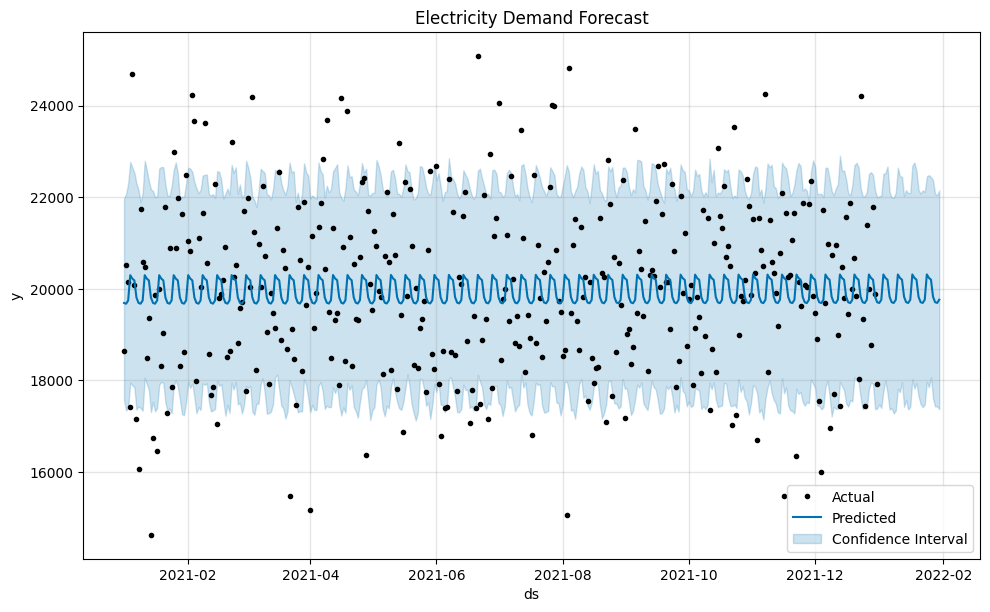

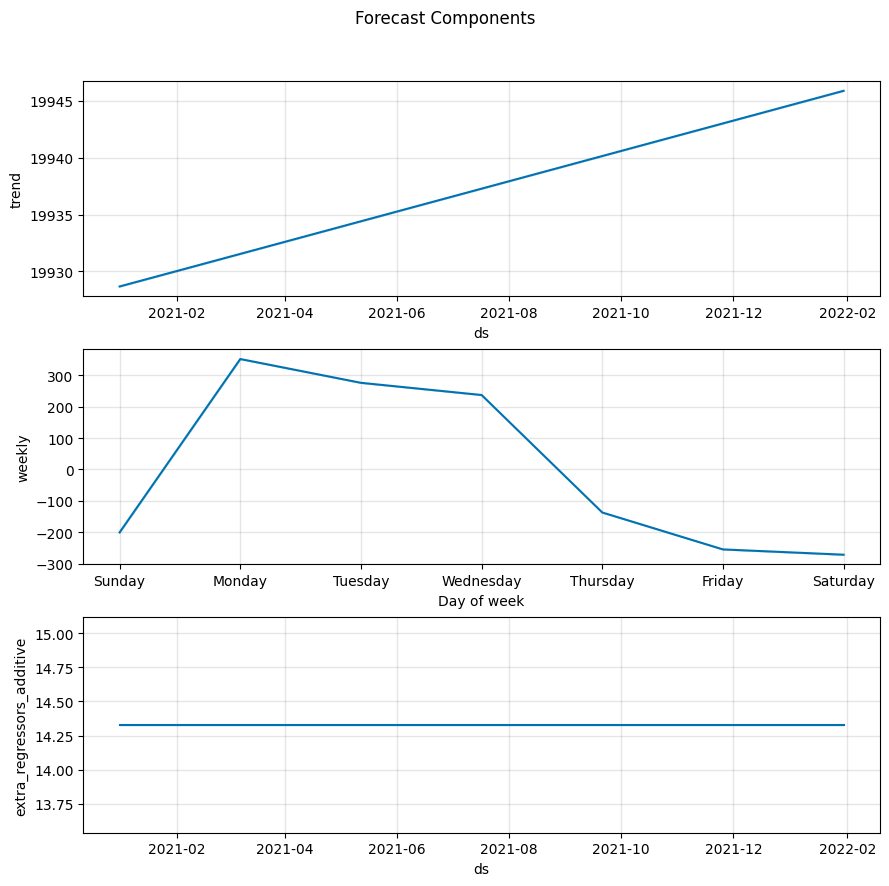

In [10]:
import matplotlib.pyplot as plt

# Plot the forecast
fig1 = m.plot(forecast)
plt.title('Electricity Demand Forecast')  # Add a title to the forecast plot
plt.legend(['Actual', 'Predicted', 'Confidence Interval'])  # Add a legend
plt.show()

# Plot the forecast components
fig2 = m.plot_components(forecast)
fig2.subplots_adjust(top=0.9)  # Adjust subplot to not overlap with the title
fig2.suptitle('Forecast Components')  # Add a title to the components plot
plt.show()
